In [1]:
"""
Template for week 4 project in Data Visualization

Solve the differential equations for Earth/Sun orbits using scipy
Plot the result orbits using matplotlib
"""

import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}

# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"


In [3]:
#########################################################################
# Part 1 -  Solve the orbital equations and plot the resulting orbits


def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    p0_x, p0_y, v0_x, v0_y = e_0
    r_0 = (p0_x ** 2 + p0_y ** 2) ** 0.5
    a0_x = (-(GRAV_CON * MASS_SUN) / (r_0 ** 3)) * p0_x
    a0_y = (-(GRAV_CON * MASS_SUN) / (r_0 ** 3)) * p0_y
    
    return tuple([v0_x, v0_y, a0_x, a0_y])

In [4]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """    
    p0_x, p0_y, v0_x, v0_y = INIT_EARTH
    scaled_init_earth = (p0_x, p0_y, v0_x * speed, v0_y * speed)
    output = odeint(orbital_eqs, scaled_init_earth, time_steps)
    x_list = output[:, 0]
    y_list = output[:, 1]
   
    return np.append([x_list], [y_list], axis=0)

In [5]:
def test_solve_orbital_eqs():
    """ Test solve_orbital_eqs() """
    
    # Small test
    solve_orbital_eqs(np.linspace(0, 1, 3), 1.0)
    solve_orbital_eqs(np.linspace(0, 1, 11), 1.00)
    solve_orbital_eqs(np.linspace(0, 10, 101), 0.5)

    # Compute Earth/Sun orbits and save for later
    sim_steps = np.linspace(0, 1000, 1001)
    ORBITS["075"] = solve_orbital_eqs(sim_steps, 0.75)
    ORBITS["100"] = solve_orbital_eqs(sim_steps, 1.00)
    ORBITS["125"] = solve_orbital_eqs(sim_steps, 1.25)
    ORBITS["150"] = solve_orbital_eqs(sim_steps, 1.50)

test_solve_orbital_eqs()

In [6]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t),p_y(t)) plots"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit for specified times in the numpy array time_steps
    
    Action: Plot both x positions and y positions versus time_steps
    using matplotlib
    """
    
    fig, axs = plt.subplots()
    
    axs.plot(time_steps, orbit[0], 'b', label='position x')
    axs.plot(time_steps, orbit[1], 'g', label='position y')
    axs.set_title(title, fontsize=15)
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    axs.set_xlabel('time (day)', fontsize=12)
    axs.set_ylabel('postion (km)', fontsize=12)
    axs.grid()
    
    return fig

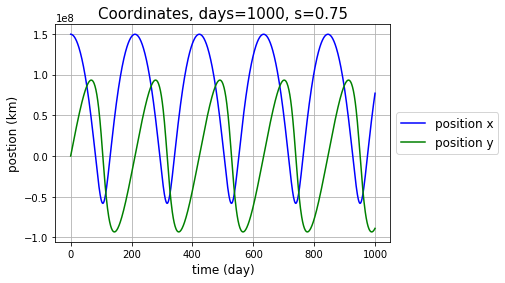

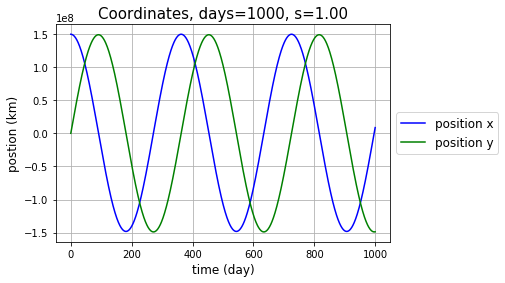

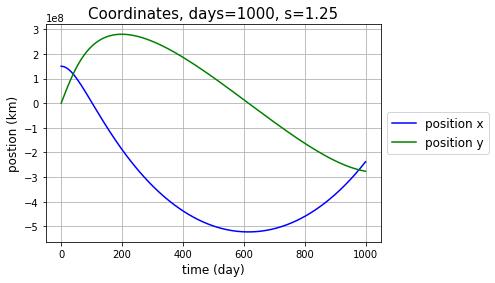

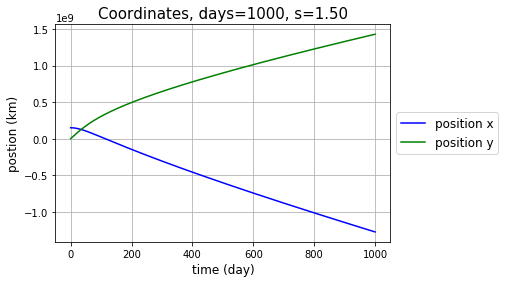

In [7]:
def test_plot_earth_coords():
    """ Test plot_earth_coords """
    
    sim_steps = np.linspace(0, 1000, 1001) 
    plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
    plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
    plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
    plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

test_plot_earth_coords()

In [8]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    fig, axs = plt.subplots()
    axs.plot(orbit[0], orbit[1])
    axs.set_aspect(1)
    axs.set_title(title, fontsize=15)
    axs.set_xlabel('position x (km)', fontsize=12)
    axs.set_ylabel('postion y (km)', fontsize=12)
    axs.grid()
    
    return fig

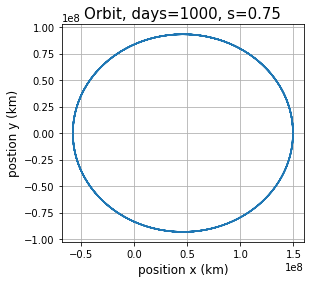

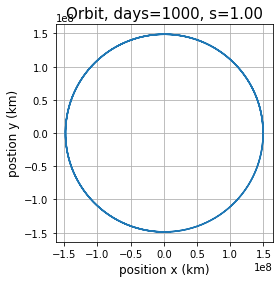

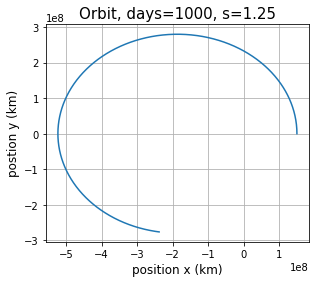

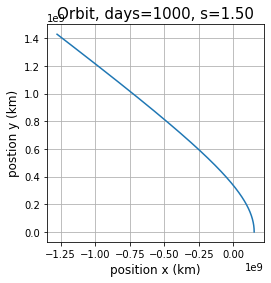

In [9]:
def test_plot_earth_orbit():
    """ Test plot_earth_orbit() """

    plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
    plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
    plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
    plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

test_plot_earth_orbit()

In [10]:
#########################################################################
# Part 2 - Animate the computed orbits


def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    min_x, max_x, min_y, max_y = limits
    pad_x = pad * (max_x - min_x)
    pad_y = pad * (max_y - min_y)
    new_ranges = tuple([min_x - pad_x, max_x + pad_x, min_y - pad_y, max_y + pad_y])
    return new_ranges

In [68]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """

    orbit_x = orbit[0]
    orbit_y = orbit[1]
    limits = tuple([min(orbit_x), max(orbit_x), min(orbit_y), max(orbit_y)])
    scaled_limits = extend_limits(limits, pad=0.1)
    
    fig, axs = plt.subplots()
    axs.set_xlim(scaled_limits[0], scaled_limits[1])
    axs.set_ylim(scaled_limits[2], scaled_limits[3])
    axs.set_title(title)
    axs.set_aspect(1)
    axs.set_xlabel('position x (km)', fontsize=12)
    axs.set_ylabel('postion y (km)', fontsize=12)
    axs.plot(0, 0, 'o', markersize=8, color="gold")#sun
    axs.grid()
    
    line, = axs.plot([], [], 'black', lw=2)
    point, = axs.plot([], [], 'b.', markersize=10)
    
    def animate(idx):
        var_t = round(idx * len(orbit_x) / 200)
        point.set_data(orbit_x[var_t], orbit_y[var_t]) 
        line.set_data(orbit_x[:var_t], orbit_y[:var_t]) 
        return line, point
    
    anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
    #anim.save(title+'.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    anim.save(title+'.mp4', writer='ffmpeg', fps=30)
    return anim

Creating animation for speed=0.75


<IPython.core.display.Javascript object>


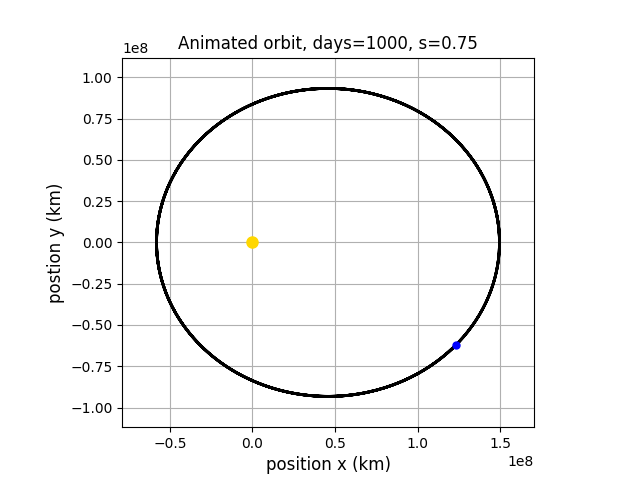

Creating animation for speed=1.00


<IPython.core.display.Javascript object>


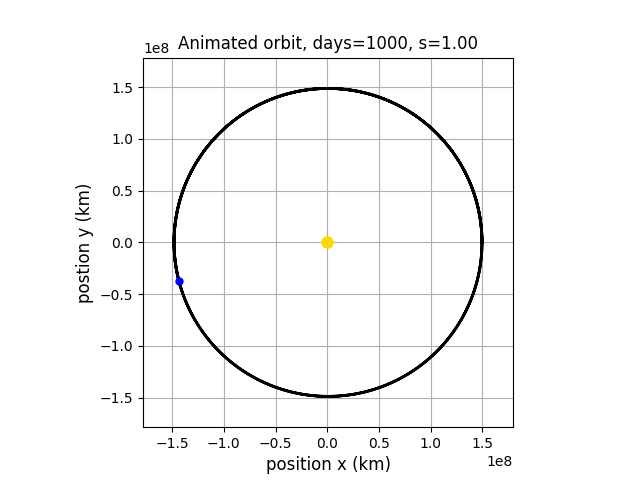

Creating animation for speed=1.25


<IPython.core.display.Javascript object>


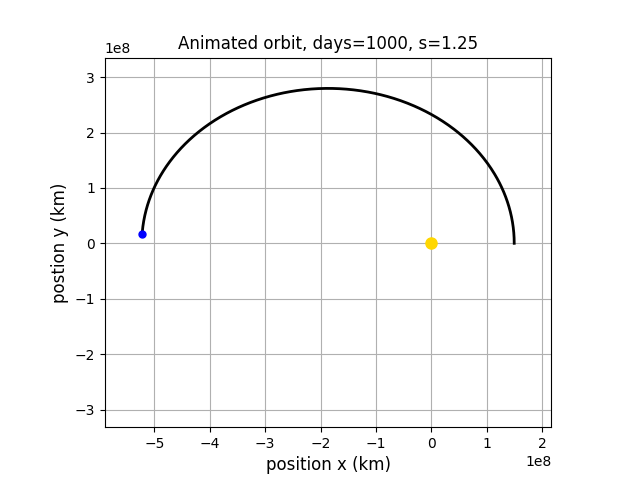

Creating animation for speed=1.50


<IPython.core.display.Javascript object>


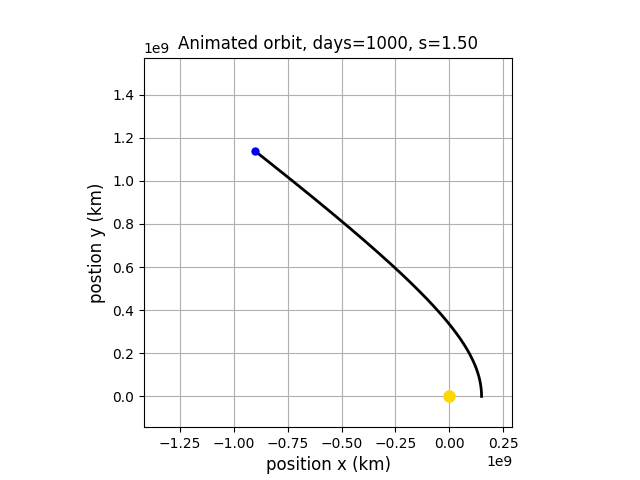

Done


In [69]:
def test_animate_earth_orbit():
    """ Test animate_earth_orbit() """
    
    print("Creating animation for speed=0.75")
    handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")
    
    print("Creating animation for speed=1.00")
    handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")
    
    print("Creating animation for speed=1.25")
    handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")
    
    print("Creating animation for speed=1.50")
    handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")
    print("Done")
    
    return handle1, handle2, handle3, handle4

%matplotlib notebook
# Save handles to animation objects so they are not garbage collected
HANDLES = test_animate_earth_orbit()

## Question 1##
**What are the geometric shapes of the various orbits computed by your simulations?**

when speed was at the initial velocity, the orbit shape was a circle and the sun is the center.
when speed was at 75% or 125% initial velocity, the orbit shape was an ellipse.
when speed was at 150% initial velocity, the oribits ahspe was a parabola.

## Question 2##
**What happened to the earth's trajectory when we increased its initial velocity by 50%?**

when increased the velocity by 50%, the earth's trajectory was not an ellipse, instead, it was like a parabola. The earth moves too fast and gets rid of the sun. It started as a curve but gradually became a straight line.